# Biodiversity Analisys Course Project

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Data Extraction & Preview

In [2]:
# Converting csv to DataFrame
observations_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')

First look

In [3]:
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Data Statistics & Dtypes

In [5]:
observations_df.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [6]:
observations_df.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


## Data Cleaning

In [7]:
observations_df.isna().any()

scientific_name    False
park_name          False
observations       False
dtype: bool

Apparently there's not missing data in the 'observations' dataset

In [8]:
observations_df.drop_duplicates(inplace=True)

In [9]:
species_df.isna().any()

category               False
scientific_name        False
common_names           False
conservation_status     True
dtype: bool

In [10]:
species_df.drop_duplicates(inplace=True)

In [11]:
species_df.conservation_status.isna().value_counts(normalize=True)

conservation_status
True     0.967205
False    0.032795
Name: proportion, dtype: float64

In [12]:
species_df.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

## Analysis

### Conservation Status Distribution

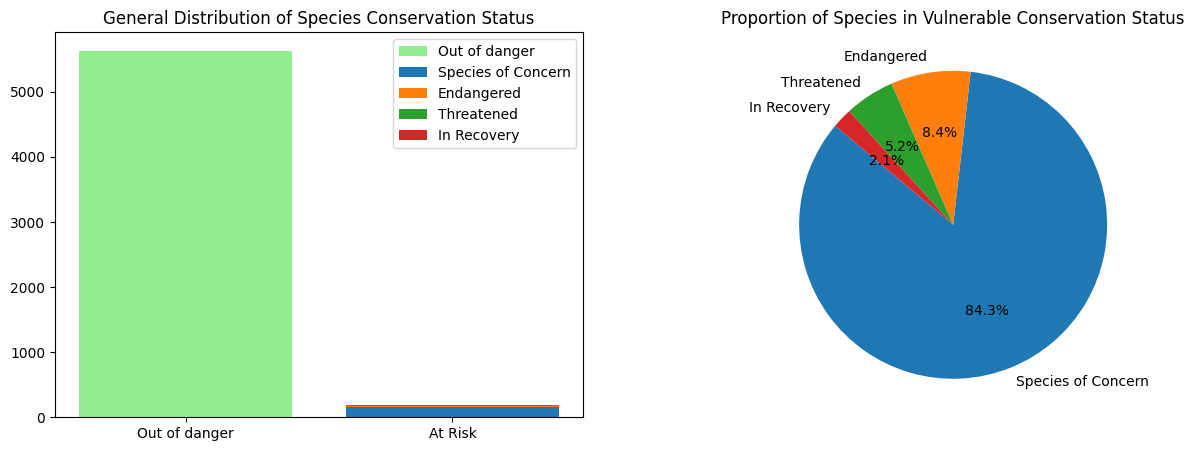

In [33]:
# Filter out NaNs and count the categories
filtered_species_df = species_df.dropna(subset=['conservation_status'])
status_counts = filtered_species_df.conservation_status.value_counts()

# Add the 'Out of danger' category for species not at risk
out_of_danger_count = species_df.conservation_status.isna().sum()
status_counts_with_out_of_danger = pd.concat([status_counts, pd.Series({'Out of danger': out_of_danger_count})])

# Data visualization
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
ax1.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=140)

ax1.set_title('Proportion of Species in Vulnerable Conservation Status')

# Bar chart
risk_total = status_counts.sum()
ax0.bar(
    'Out of danger',
    out_of_danger_count,
    color='lightgreen',
    label='Out of danger')

bottom = 0

for idx, count in status_counts.items():
    ax0.bar('At Risk', count, bottom=bottom, label=idx)
    bottom += count

ax0.set_title('General Distribution of Species Conservation Status')
ax0.legend()


plt.show()

plt.show()


In the graph on the left, and assuming that species with 'NaN' values in the conservation_status column are considered 'out of danger,' we see that only 3.2% of all registered species are at risk. On the other hand, the graph on the right focuses only on species that are at some level of risk. It shows that 'Species of Concern' which identifies species that may be on the path to becoming endangered make up 84.3% of the species under any type of risk.

### Conservation Status & Nº of Observation 

In [16]:
# Merge original DataFrames to extract total observations per category
merged_df = pd.merge(
    observations_df,
    species_df[['scientific_name', 'category', 'conservation_status']],
    on='scientific_name',
    how='left')

merged_df

,scientific_name,park_name,observations,category,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,NaN
...,...,...,...,...,...
25596,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,NaN
25597,Otospermophilus beecheyi,Bryce National Park,130,Mammal,NaN
25598,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,NaN
25599,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,NaN


In [17]:
conservation_obs = merged_df.dropna().groupby('conservation_status')['observations'].sum().reset_index()
conservation_obs

,conservation_status,observations
0,Endangered,3513
1,In Recovery,2107
2,Species of Concern,93962
3,Threatened,3339


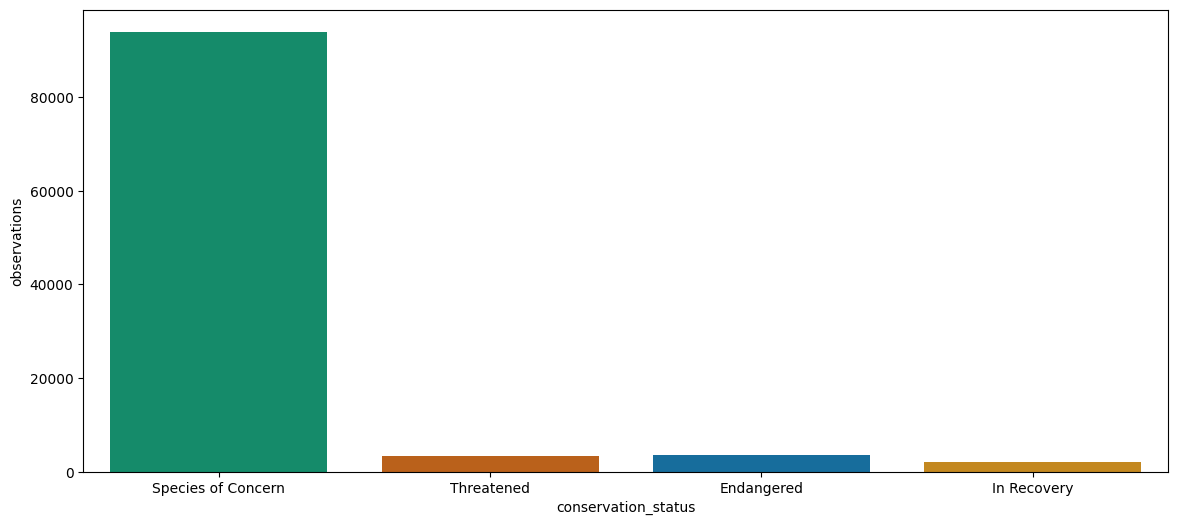

In [37]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=conservation_obs,
    x='conservation_status',
    y='observations',
    order=['Species of Concern','Threatened','Endangered','In Recovery'],
    hue='conservation_status',
    legend=False, palette='colorblind')

plt.show()

### Species Category Distribution

In [27]:
species_df.category.value_counts()

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

In [61]:
# Separate animal and plant species values counts
animal_species = pd.DataFrame(species_df.category[~species_df.category.isin(['Vascular Plant', 'Nonvascular Plant'])].value_counts())
plant_species = pd.DataFrame(species_df.category[species_df.category.isin(['Vascular Plant', 'Nonvascular Plant'])].value_counts())

# Extract values counts
animal_observations = merged_df[~merged_df.category.isin(['Vascular Plant', 'Nonvascular Plant'])].groupby('category')['observations'].sum().reset_index()
plant_observations = merged_df[merged_df.category.isin(['Vascular Plant', 'Nonvascular Plant'])].groupby('category')['observations'].sum().reset_index()

# New DataFrame with Categories values counts and total amount of observations
animal_sp_obs = pd.merge(animal_species,
                        animal_observations,
                        on='category',
                        how='inner')

plant_sp_obs = pd.merge(plant_species,
                        plant_observations,
                        on='category',
                        how='inner')


In [28]:
animal_sp_obs

,category,count,observations,count_norm,obs_norm
0,Bird,521,331606,1.005000,1.005000
1,Mammal,214,162608,0.310430,0.415207
2,Fish,127,72901,0.113597,0.102135
3,Amphibian,80,45068,0.007262,0.005000
4,Reptile,79,45822,0.005000,0.007631


Normalizing Data

In [29]:
scaler = MinMaxScaler()

# Creating new columns for both `count` and `observations` normalized values
animal_sp_obs['count_norm'] = scaler.fit_transform(animal_sp_obs[['count']]) +0.005
plant_sp_obs['count_norm'] = scaler.fit_transform(plant_sp_obs[['count']]) +0.005

animal_sp_obs['obs_norm'] = scaler.fit_transform(animal_sp_obs[['observations']]) +0.005
plant_sp_obs['obs_norm'] = scaler.fit_transform(plant_sp_obs[['observations']]) +0.005

In [30]:
animal_sp_obs

,category,count,observations,count_norm,obs_norm
0,Bird,521,331606,1.005000,1.005000
1,Mammal,214,162608,0.310430,0.415207
2,Fish,127,72901,0.113597,0.102135
3,Amphibian,80,45068,0.007262,0.005000
4,Reptile,79,45822,0.005000,0.007631


In [31]:
plant_sp_obs

,category,count,observations,count_norm,obs_norm
0,Vascular Plant,4470,2791714,1.005,1.005
1,Nonvascular Plant,333,190653,0.005,0.005


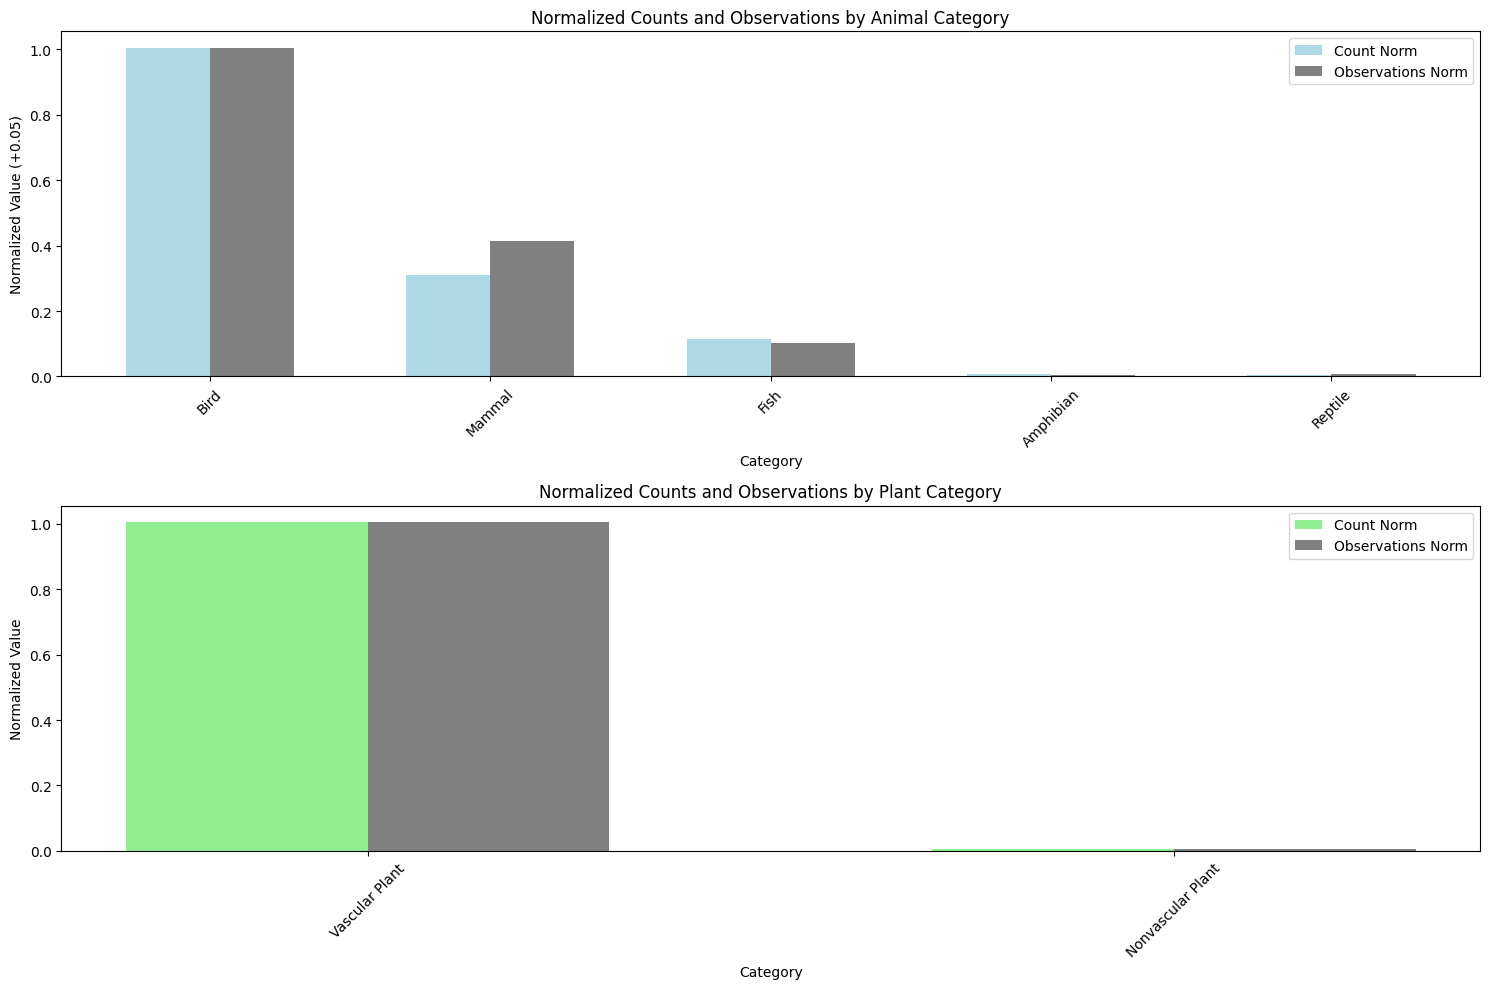

In [32]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(15, 10))

# Bar width and position
bar_width = 0.3
index0 = np.arange(len(animal_sp_obs['category']))
index1 = np.arange(len(plant_sp_obs['category']))

#### Animal categories plot
# Plot bars for count_norm and obs_norm
bars_count_norm = ax0.bar(index0 - bar_width / 2, animal_sp_obs['count_norm'], bar_width, label='Count Norm', color='lightblue')
bars_obs_norm = ax0.bar(index0 + bar_width / 2, animal_sp_obs['obs_norm'], bar_width, label='Observations Norm', color='grey')

# Labels and legend
ax0.set_xlabel('Category')
ax0.set_ylabel('Normalized Value (+0.05)')
ax0.set_title('Normalized Counts and Observations by Animal Category')
ax0.set_xticks(index0)
ax0.set_xticklabels(animal_sp_obs['category'], rotation=45)
ax0.legend()

#-----------------------------------------------------------

#### Plant categories plot
# Plot bars for count_norm and obs_norm
bars_count_norm = ax1.bar(index1 - bar_width / 2, plant_sp_obs['count_norm'], bar_width, label='Count Norm', color='lightgreen')
bars_obs_norm = ax1.bar(index1 + bar_width / 2, plant_sp_obs['obs_norm'], bar_width, label='Observations Norm', color='grey')

# Labels and legend
ax1.set_xlabel('Category')
ax1.set_ylabel('Normalized Value')
ax1.set_title('Normalized Counts and Observations by Plant Category')
ax1.set_xticks(index1)
ax1.set_xticklabels(plant_sp_obs['category'], rotation=45)
ax1.legend()


plt.tight_layout()
plt.show()

We can confirm that the number of registered species per category is positively correlated with the number of observations and sightings of those species

In [67]:
## BORRAAAAAAR
merged_df.groupby('park_name')['observations'].sum().reset_index()

,park_name,observations
0,Bryce National Park,633043
1,Great Smoky Mountains National Park,473979
2,Yellowstone National Park,1584890
3,Yosemite National Park,948460


### Distribution of Endangered Species by National Park

In [70]:
vulnerable_species = merged_df[~merged_df['conservation_status'].isna()]
vulnerable_species_sum = vulnerable_species.groupby(['park_name', 'conservation_status'])['observations'].sum().reset_index()

total_species_obs_park = merged_df.groupby('park_name')['observations'].sum().reset_index()

In [68]:
vulnerable_species_sum

,park_name,conservation_status,observations
0,Bryce National Park,Endangered,619
1,Bryce National Park,In Recovery,388
2,Bryce National Park,Species of Concern,17011
3,Bryce National Park,Threatened,591
4,Great Smoky Mountains National Park,Endangered,393
5,Great Smoky Mountains National Park,In Recovery,248
6,Great Smoky Mountains National Park,Species of Concern,11735
7,Great Smoky Mountains National Park,Threatened,440
8,Yellowstone National Park,Endangered,1558
9,Yellowstone National Park,In Recovery,889


In [71]:
total_species_obs_park

,park_name,observations
0,Bryce National Park,633043
1,Great Smoky Mountains National Park,473979
2,Yellowstone National Park,1584890
3,Yosemite National Park,948460


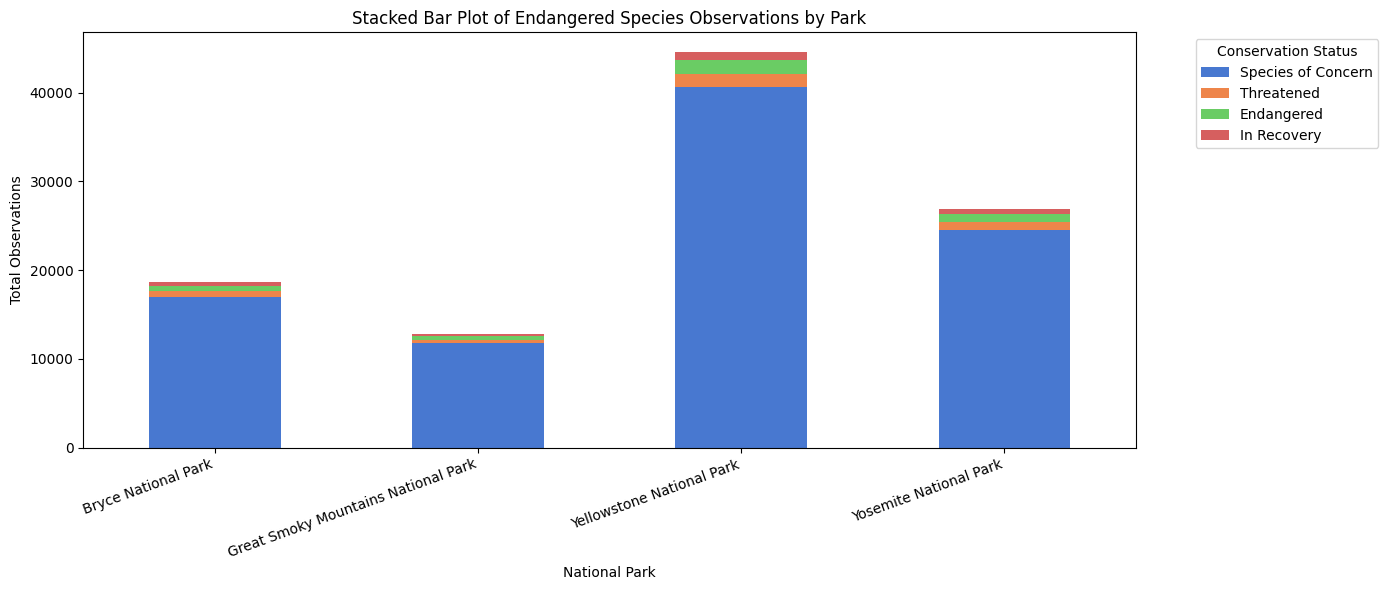

ConversionError: Failed to convert value(s) to axis units: 0                    Bryce National Park
1    Great Smoky Mountains National Park
2              Yellowstone National Park
3                 Yosemite National Park
Name: park_name, dtype: object

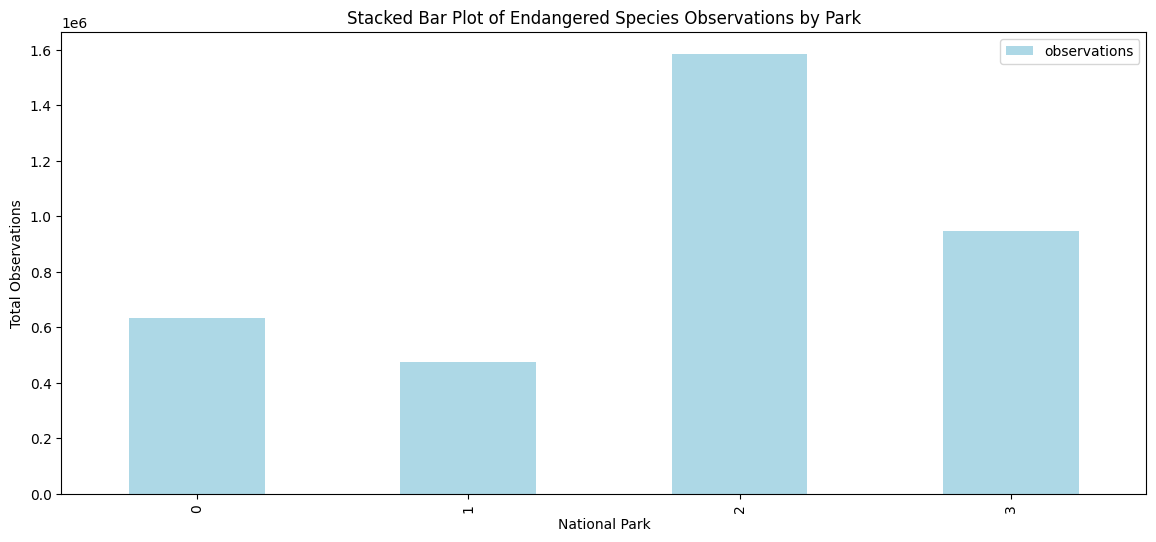

In [81]:
# Pivot the DataFrame to have conservation categories as columns
vulnerable_species_pivot = vulnerable_species_sum.pivot_table(
    index='park_name', 
    columns='conservation_status', 
    values='observations', 
    aggfunc='sum'
).fillna(0)

# Reorder the columns according to the desired order
desired_order = ['Species of Concern', 'Threatened', 'Endangered', 'In Recovery']
vulnerable_species_pivot = vulnerable_species_pivot[desired_order]

# Create the stacked bar plot
vulnerable_species_pivot.plot(
    kind='bar', 
    stacked=True, 
    figsize=(14, 6), 
    color=sns.color_palette('muted', n_colors=len(desired_order))
)
# Add labels and title
plt.xlabel('National Park')
plt.ylabel('Total Observations')
plt.title('Stacked Bar Plot of Endangered Species Observations by Park')
plt.xticks(rotation=20, ha='right')

# Show the legend
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


total_species_obs_park.plot(
    kind='bar', 
    figsize=(14, 6),
    color= 'lightblue'
)
# Add labels and title
plt.xlabel('National Park')
plt.ylabel('Total Observations')
plt.title('Stacked Bar Plot of Endangered Species Observations by Park')
plt.xticks(total_species_obs_park.park_name,rotation=20, ha='right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

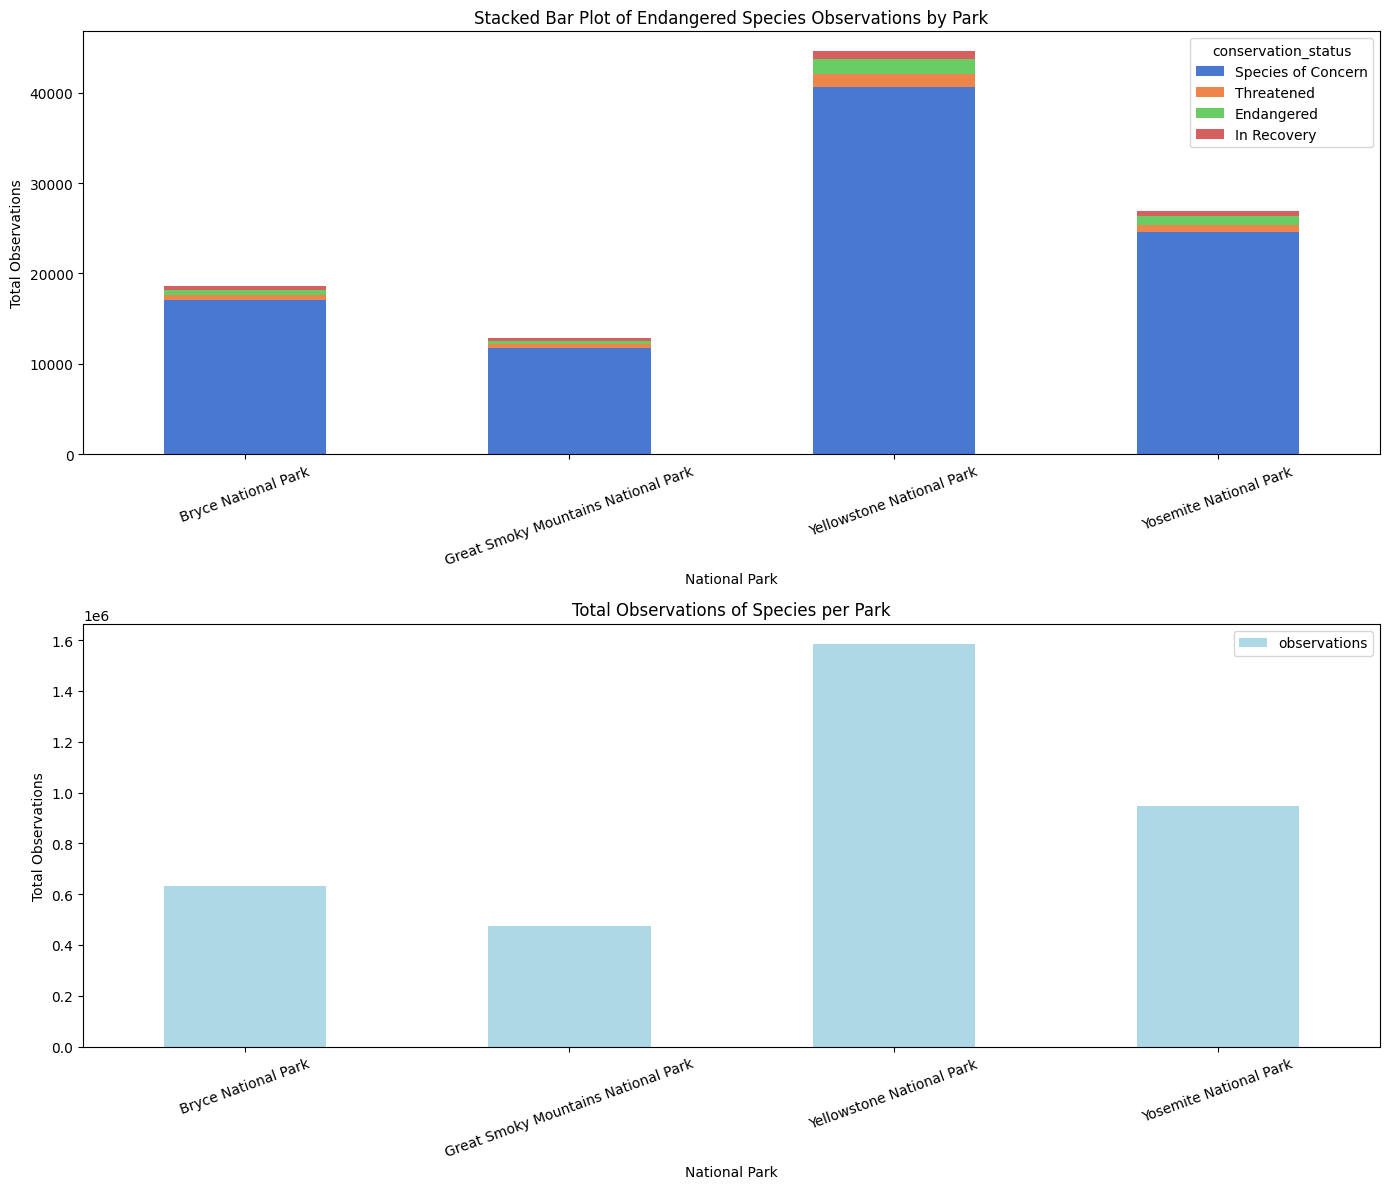

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots (two rows, one column)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Pivot the DataFrame to have conservation categories as columns
vulnerable_species_pivot = vulnerable_species_sum.pivot_table(
    index='park_name', 
    columns='conservation_status', 
    values='observations', 
    aggfunc='sum'
).fillna(0)

# Reorder the columns according to the desired order
desired_order = ['Species of Concern', 'Threatened', 'Endangered', 'In Recovery']
vulnerable_species_pivot = vulnerable_species_pivot[desired_order]

# Create the stacked bar plot for endangered species observations
vulnerable_species_pivot.plot(
    kind='bar', 
    stacked=True, 
    ax=axes[0],  # Plot on the first subplot
    color=sns.color_palette('muted', n_colors=len(desired_order))
)
# Add labels and title to the first plot
axes[0].set_xlabel('National Park')
axes[0].set_ylabel('Total Observations')
axes[0].set_title('Stacked Bar Plot of Endangered Species Observations by Park')
axes[0].tick_params(axis='x', rotation=20)

# Plot the total species observations per park on the second subplot
total_species_obs_park.plot(
    kind='bar', 
    ax=axes[1],  # Plot on the second subplot
    color='lightblue'
)
# Add labels and title to the second plot
axes[1].set_xlabel('National Park')
axes[1].set_ylabel('Total Observations')
axes[1].set_title('Total Observations of Species per Park')

# Ensure park names (x-ticks) are displayed correctly
axes[1].set_xticks(range(len(total_species_obs_park)))
axes[1].set_xticklabels(total_species_obs_park.park_name, rotation=20)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


After analyzing the data, we can observe that while Yellowstone National Park appears to have the highest number of animals of endangered species, this figure is proportional to the total number of observations recorded at the park.